
- Name : Shubham Shaha
- PRN  : 240340128031
- Date : 20-05-2024

# Image Processing with Neural Network

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

## 1.Import Statements

In [1]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## 2.Setup Global Parameters

In [2]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
N_SAMPLES = 1000     
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3.Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## 4.Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [4]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

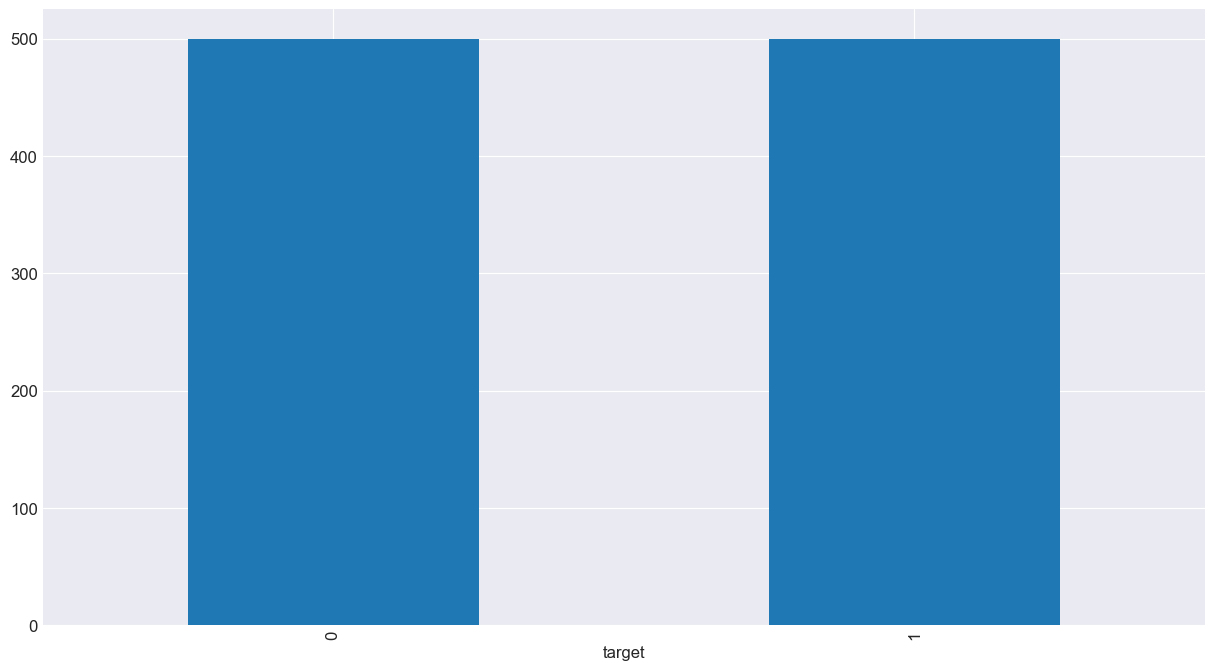

In [8]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

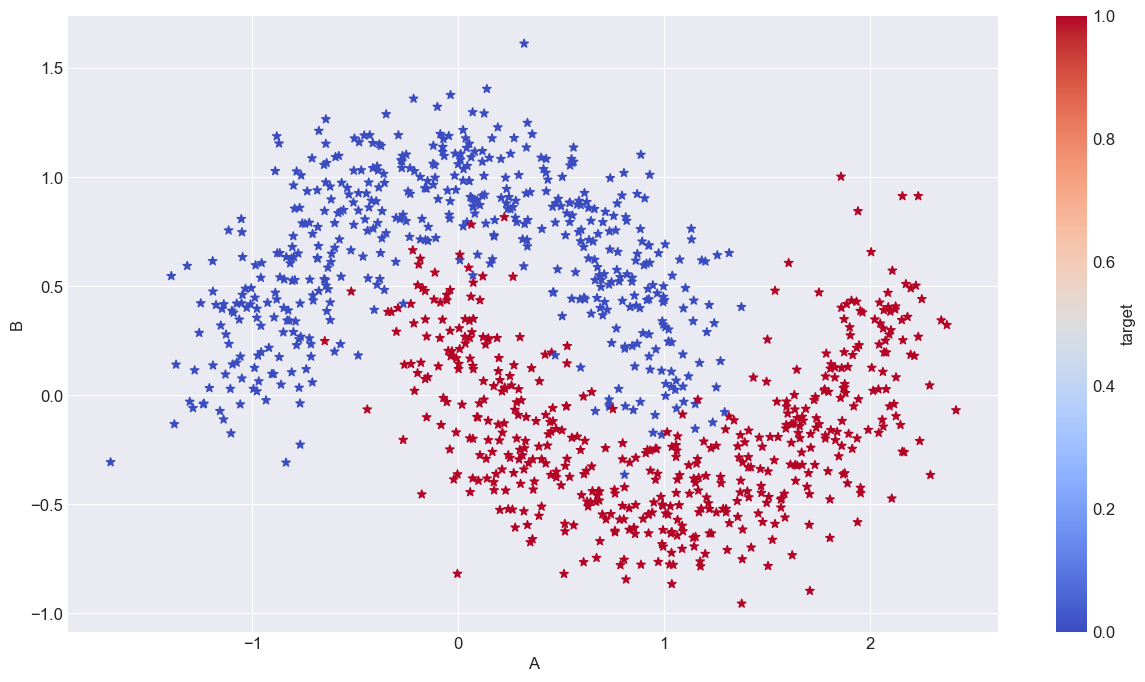

In [9]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

## 5.Preprocessing data 

In [10]:
y= pd.get_dummies(y).to_numpy()  ### Converting y to one hot encoded data for multiclass
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [11]:
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state = RANDOM_STATE)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [12]:
'''y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)'''

'y_train = y_train.reshape(-1,1)\ny_test = y_test.reshape(-1,1)'

### 6.Activation functions

In [13]:
def fn_activ(z):
    return np.tanh(z)

def fn_active_prime(z):
    return 1.-np.tanh(z)**2

''' def fn_sigmoid(z):

    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        sigmoid values of z

    return 1.0/(1.0 + np.exp(-z))
'''

def fn_softmax(z):
    '''
    Args: 
        z : a matrix of z values of shape(m, n_output)
    returns:
        softmax values of z
    '''
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z, axis=1, keepdims=True)
    


## 7. Model building 


In [14]:
# predict the output
def predict(model, X_p):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']    
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_p.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_softmax(z2)  # Activation
    
    return np.argmax(a2,axis=1) # Is it greater or equal to 0.5  

In [15]:
## Calculating loss
def Cal_loss(model, X_l, y_l):
    
    W1, b1, W2, b2= model['W1'], model['b1'], model['W2'], model['b2']  
    
    m = X_l.shape[0]
      
    ### Forward Propagation
    
    ## Layer 1
    
    z1 = X_l.dot(W1) + b1  # Aggregation
    a1 = fn_activ(z1) # Activation
    
    ## Layer 2
    z2 = a1.dot(W2) + b2  # Aggregation
    a2 = fn_softmax(z2)  # Activation
    
    data_loss = -(y_l*np.log(a2)+(1-y_l)*np.log(1-a2)).sum() # Binary 
    
    return data_loss / m # devided by no. of samples

In [16]:
def built_model(X_train,y_train, nn_out, nn_hdim, alpha , n_epochs = EPOCHS):

    '''
    Args:
        X_train: Training features
        y_train: Training labels
        nn_out: size of output
        nn_hdim: number of nodes in hidden layer
    '''  
    m , nn_input_dim  = X_train.shape   
    nn_output_dim = nn_out
    
    ### W1 =  rng.random((nn_input_dim,nn_hdim),dtype = np.float32)/np.sqrt(nn_input_dim)  
    ### W2 =  rng.random((nn_hdim,nn_out),dtype = np.float32)/np.sqrt(nn_hdim)
    ## normally distributed randomly generated data not learning fast enough
    
    ### size = 2,4
    W1 =  np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)

    ### size = 4,2
    W2 =  np.random.rand(nn_hdim,nn_out)/np.sqrt(nn_hdim)

    ### size = 4
    b1 = np.zeros((1,nn_hdim),dtype = 'float32')

    ### size = 2
    b2 = np.zeros((1,nn_out),dtype = 'float32')
    
    curr_loss = 0
    loss, epoch = [],[]
    
    for i in range(0, n_epochs):

        #### forward propagation

        ## layer 1
        Z1 = X_train.dot(W1)+b1
        a1 = fn_activ(Z1)

        ### Layer 2
        Z2 = a1.dot(W2)+b2
        a2 = fn_softmax(Z2)

        #### Back Propagation
        assert (a2.shape == y_train.shape), f'check y{a2.shape}/{y_train.shape}'
        dz2 = a2-y_train  ##### remember dim of a2 and y to be same

        dw2 = (a1.T).dot(dz2)
        assert (W2.shape == dw2.shape), f'check w2 {W2.shape}/{dw2.shape}'

        db2 = np.sum(dz2,axis=0, keepdims = True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        #### Layer 1 

        dz1 = da1 * fn_active_prime(Z1)
        assert (Z1.shape == dz1.shape), f'check Z1 {z1.shape}/{dz1.shape}' 

        dw1 = (X_train.T).dot(dz1)
        assert (W1.shape == dw1.shape), f'check w1 {W1.shape}/{dw1.shape}'

        db1 = np.sum(dz1,axis=0, keepdims = True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        ##### gradient update

        W1 += -alpha*dw1/m
        b1 += -alpha*db1/m
        W2 += -alpha*dw2/m
        b2 += -alpha*db2/m

        model = {'W1':W1,'b1':b1,
                'W2':W2,'b2':b2}

        curr_loss = Cal_loss(model,X_train,y_train)
        loss.append(curr_loss)
        epoch.append(i)

        if i%1000 == 0 :
            print(f'After epoch: {i:3d} ; loss : {curr_loss:.5f}')
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model

## 8.Training the model

In [17]:
nn_out_dim = 2
nn_hdim = [1,2,3,4,5]
ALPHA = [0.05, 0.1, 0.15, 0.2, 0.25]  # learning rate

loss_hist = {}
# training model
model = built_model(X_train,y_train, nn_out_dim, nn_hdim[4], ALPHA[4])

After epoch:   0 ; loss : 1.40007
After epoch: 1000 ; loss : 0.27431
After epoch: 2000 ; loss : 0.16123
After epoch: 3000 ; loss : 0.14814
After epoch: 4000 ; loss : 0.14244
After epoch: 5000 ; loss : 0.13889
After epoch: 6000 ; loss : 0.13660
After epoch: 7000 ; loss : 0.13507
After epoch: 8000 ; loss : 0.13399
After epoch: 9000 ; loss : 0.13318


<Axes: xlabel='epoch'>

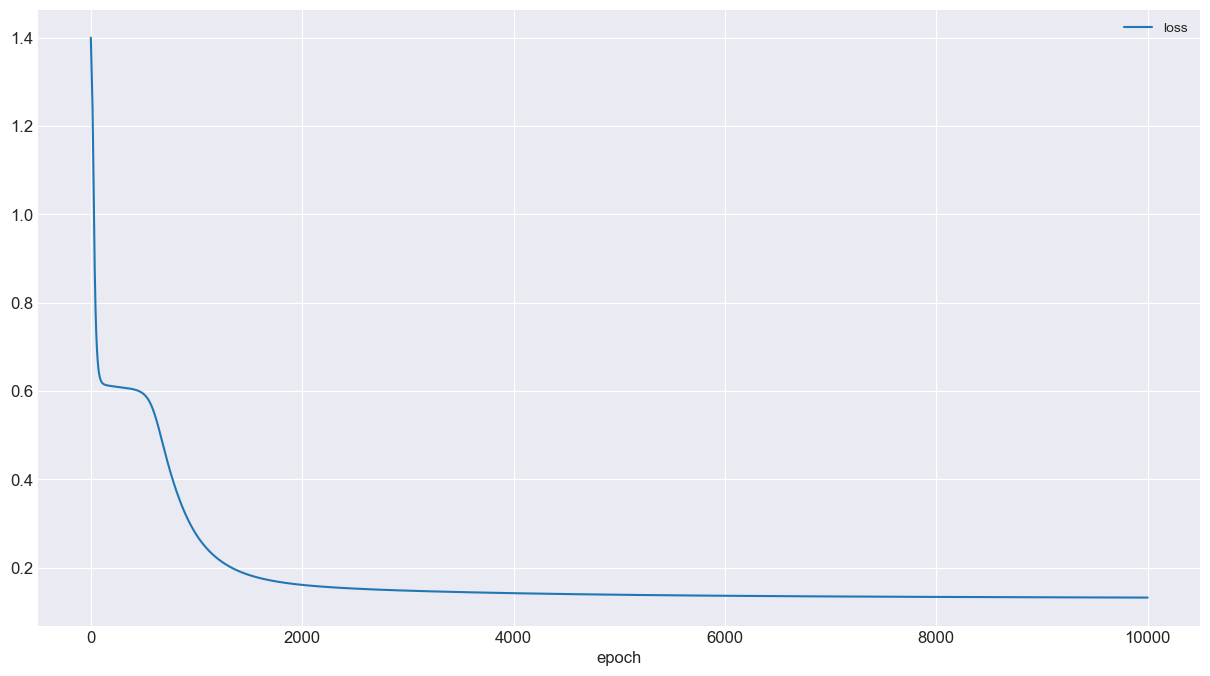

In [18]:
pd.DataFrame(loss_hist).plot(x = 'epoch')

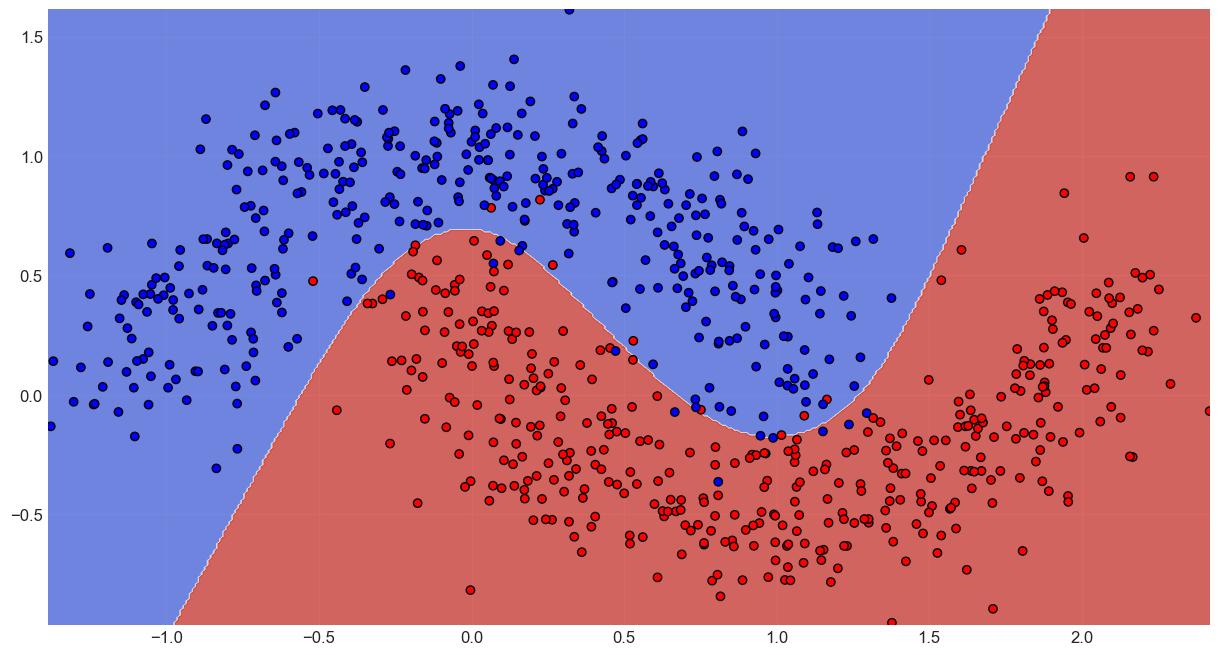

In [19]:
fig,ax = plt.subplots() ### instatiation of plt object
dm = 0.01 ## spacing of grid
x_min, x_max = X_train[:,0].min()-dm, X_train[:,0].max()+dm
y_min, y_max = X_train[:,1].min()-dm, X_train[:,1].max()+dm

xx,yy = np.meshgrid(np.arange(x_min, x_max,dm), np.arange(y_min, y_max,dm))  #### generate mesh

XX = np.c_[xx.ravel(),yy.ravel()] ### prepare feature data

y_pred = predict(model, XX)
Z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,Z,cmap = CMAP, alpha = 0.8)
ax.scatter(X_train[:,0],X_train[:,1],c = y_train.argmax(axis=1),edgecolors = 'k',cmap = plt.cm.bwr)

In [20]:
### training accuracy , loss, cf
y_pred = predict(model, X_train)
print(accuracy_score(y_train.argmax(axis=1),y_pred))
print(Cal_loss(model, X_train,y_train))
cm = confusion_matrix(y_train.argmax(axis=1),y_pred)
cm

0.97375
0.13250555233282818


array([[389,  11],
       [ 10, 390]], dtype=int64)

In [21]:
### testing accuracy , loss, cf

In [22]:
y_pred = predict(model, X_test)
print(accuracy_score(y_test.argmax(axis=1),y_pred))
print(Cal_loss(model, X_test,y_test))
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

0.985
0.10853736620583518


array([[99,  1],
       [ 2, 98]], dtype=int64)

## Questions

Q1: Is this model more accurate compared to previous model?

Yes. For learning rate 0.1, number 10000 and number of nodes in hidden layer 1, the training accuracy and testing accuracy are observed to be significantly more for multi-class prediction (0.9775 > 0.8666666666666667, 0.985>0.9 respectively).

Q2: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.


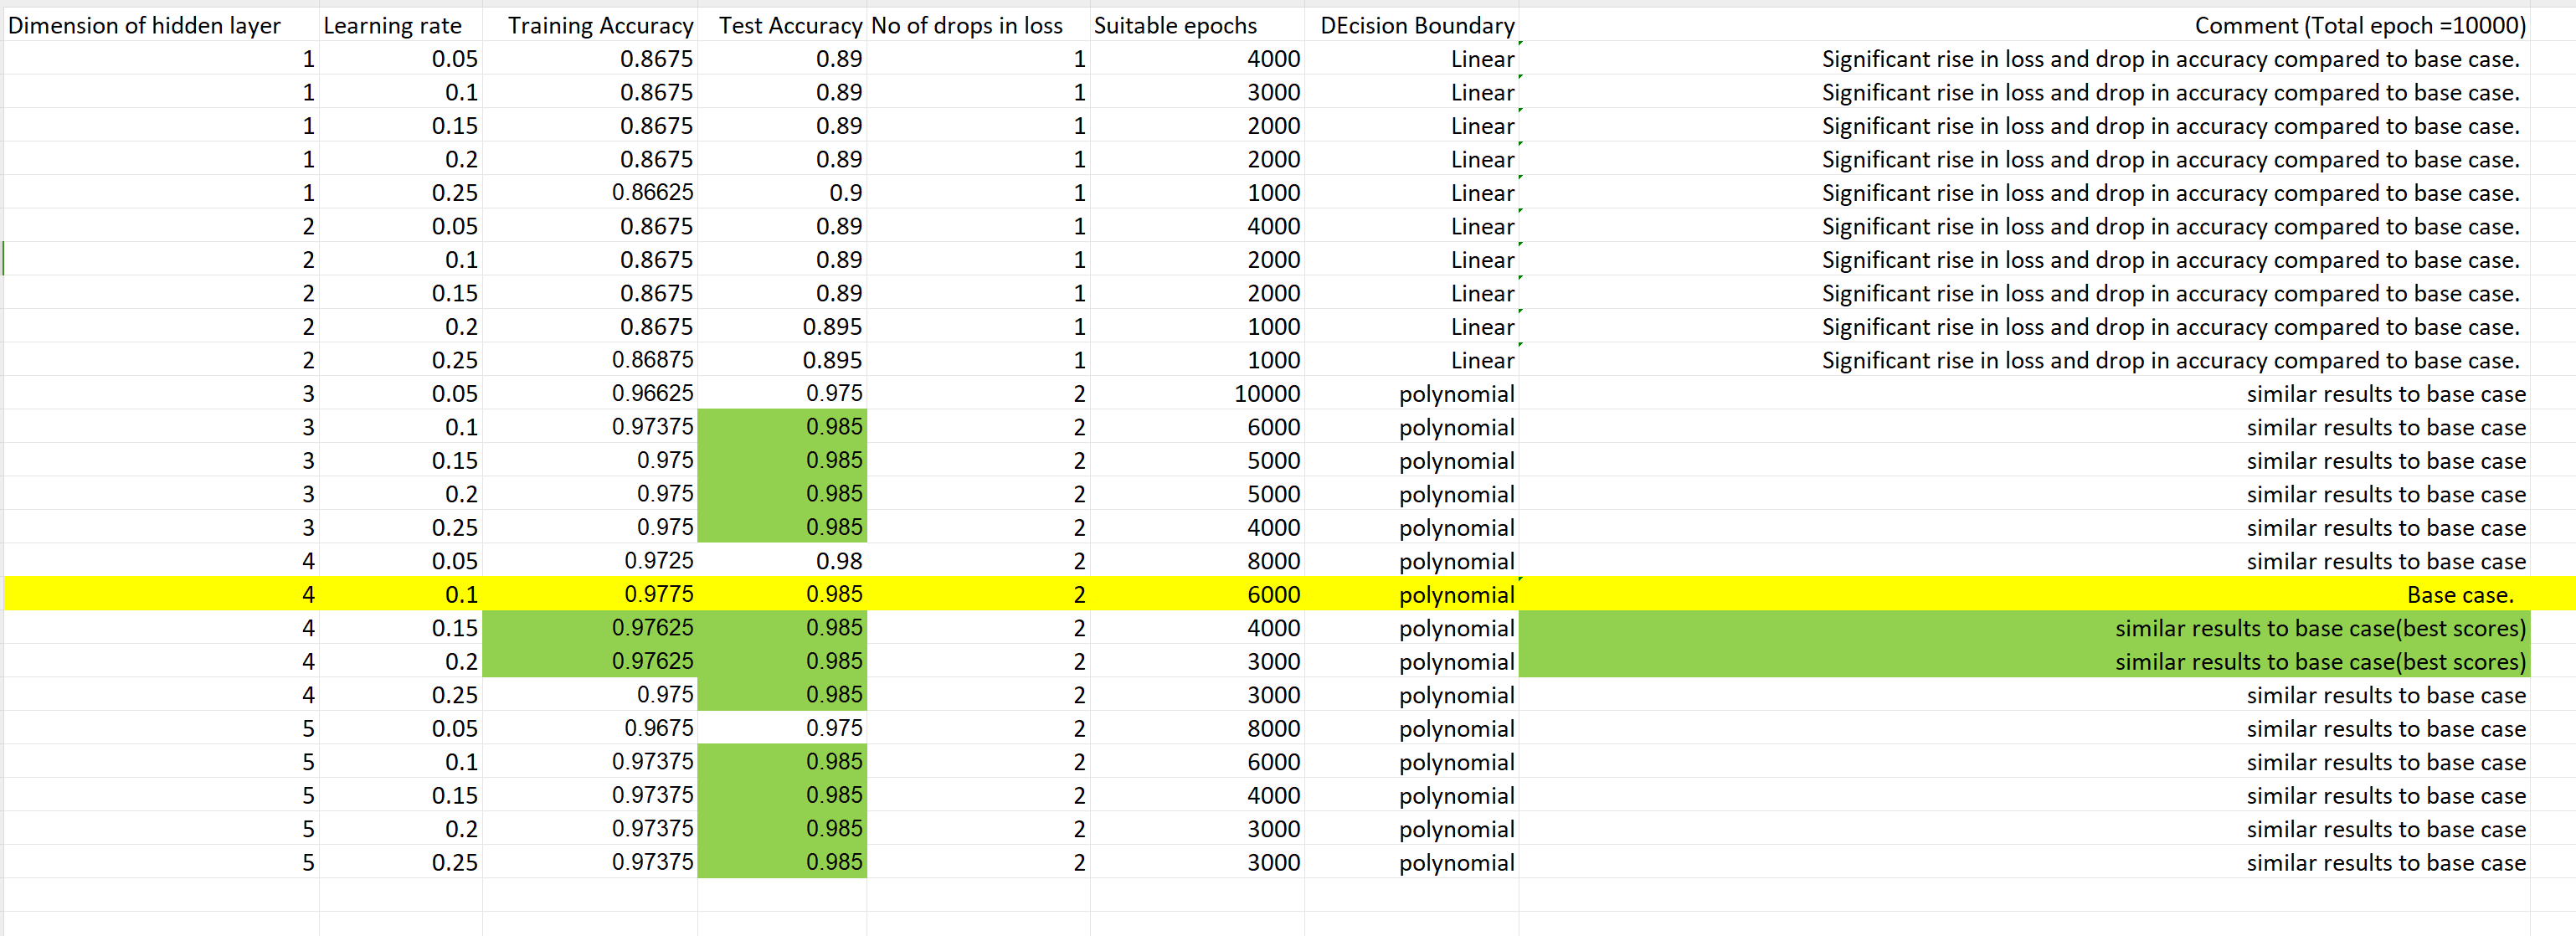

Q3: What lines will you change to convert it into multi-class prediction model?

chages are - 
1. The output layers activation function is changed from sigmoid to softmax. The label for prediction is not threshold based but given by class with maximum probability given by softmax function.
2. The labels required for multiclass prediction in onehotencoded format.
3. The reshaping of labels to matrix is not required specifically as onehotencoding gives matrix. 
4. Normally distributed randomly generated weights are not learning fast enough hence, weights  are randomly initiated.

Q4: How many epochs are sufficient?

From the table above, it can be concluded that there are 2 drops in losses. And for many combinations of learning rate and number of nodes in hidden layer, only one drop is observed for 1000 epochs and decision boundary is almost linear. Hence it can be concluded that the model has not completed learning, which was conformed by increasing no of epochs. For the combinations where the second drop in loss was observed with a polynomial decision boundary, the loss was observed to be stabalized for varying numbers of epoch from 600 to 10000. From table it can be deducted that as learning rate increases, the number of epochs sufficient decreases. The number of epochs sufficient also depends on the number of nodes in hidden layer.